___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
# for preprocessing and vis.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from pprint import pprint 

# text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Machine learning util.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, \
f1_score, recall_score,ConfusionMatrixDisplay
import optuna
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score
from scikitplot.metrics import plot_roc, plot_precision_recall
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


# Deep learning util.


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arwao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arwao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arwao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arwao\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
pprint(df['Review Text'][475])

('I bought this in the white, size m (140lbs., 5\'8", 34b) because i wanted a '
 'baggy fit, which i got, so this is tts. the white is more of an off-white '
 'rather than a bright white, which i like because i happen to be looking for '
 'an off-white tee. and the shape is good--even in a larger size, this tee '
 'nips in at the waist.however, the quality of this tee is lacking, as it is '
 'the typical, cheap, marled, slightly see-through material that seems to be '
 'everywhere these days and the band on the back of th')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


### Data Wrangling

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
# drop rows with no review 
df = df.dropna(axis=0,  how = 'all', subset=['Review Text'])

In [10]:
# renaming the columns to more suitable ones
df.rename(columns = {'Review Text':'Review',
                     'Recommended IND':'Sentiment'}, 
                      inplace = True)

In [11]:
# map the sentiment to a label
df['Sentiment'] = df['Sentiment'].map({0:'Negative' , 1: 'Positive'})

In [12]:
df['Sentiment'][:3]

0    Positive
1    Positive
2    Negative
Name: Sentiment, dtype: object

### Data visualization

In [13]:
neg_reviews =  df[df['Sentiment'] == 'Negative']
# group negative reviews based on the class category
neg_reviews_count = neg_reviews.groupby('Class Name').size().reset_index(name='Negative Reviews Count')
most_neg_products = neg_reviews_count.sort_values(by='Negative Reviews Count', ascending=False).head(20)

most_neg_products.columns = ['Item', 'Negative Reviews Count']
print("Items with the most negative reviews:")
most_neg_products.style.background_gradient(cmap='Reds')

Items with the most negative reviews:


,Item,Negative Reviews Count
1,Dresses,1197
6,Knits,868
0,Blouses,577
15,Sweaters,280
11,Pants,226
2,Fine gauge,177
13,Skirts,143
5,Jeans,133
4,Jackets,107
9,Lounge,95


In [14]:
pos_reviews =  df[df['Sentiment'] == 'Positive']
pos_reviews_count = pos_reviews.groupby('Class Name').size().reset_index(name='Postive Reviews Count')
most_pos_products = pos_reviews_count.sort_values(by='Postive Reviews Count', ascending=False).head(20)


most_pos_products.columns = ['Item', 'Postive Reviews Count']
print("Items with the most postive reviews:")
most_pos_products.style.background_gradient(cmap='Blues')

Items with the most postive reviews:


,Item,Postive Reviews Count
3,Dresses,4948
8,Knits,3758
0,Blouses,2406
13,Pants,1124
17,Sweaters,1100
7,Jeans,971
4,Fine gauge,882
15,Skirts,760
6,Jackets,576
11,Lounge,574


In [17]:
negative_rev = neg_reviews.groupby(['Clothing ID', 'Class Name']).size().reset_index(name='Negative Reviews Count')
most_negative_items = negative_rev.sort_values(by='Negative Reviews Count', ascending=False).head(5)
print('Top 5 items with most negative reviews:')
print(most_negative_items)

Top 5 items with most negative reviews:
     Clothing ID Class Name  Negative Reviews Count
444         1078    Dresses                     180
268          862      Knits                     142
460         1094    Dresses                     132
274          868      Knits                     105
241          829    Blouses                      88


The top 3 items are similar in both negative and postive reviews

In [18]:
negative_rev.sort_values(by='Negative Reviews Count', ascending=False).head(5)

,Clothing ID,Class Name,Negative Reviews Count
444,1078,Dresses,180
268,862,Knits,142
460,1094,Dresses,132
274,868,Knits,105
241,829,Blouses,88


These items with ID (1078, 862, 1094, 868, 829) have too many negative reviews, <br> maybe these items should be dropped from the website or look into thier reviews to figure out what is wrong with them. 

Example of a negative comment:

In [19]:
pprint(df[df['Clothing ID'] == 829]['Review'].iloc[2])

('Not keeping this one. the fabric is a bit tacky-looking in person, the cut '
 "is odd and it's just not me. fit is fine and there are snaps to keep the "
 'neckline flat and shaped, the colors are as shown and it is a good length '
 '(falls to top of hip). i simply did not like it. too metallic looking '
 'maybe...')


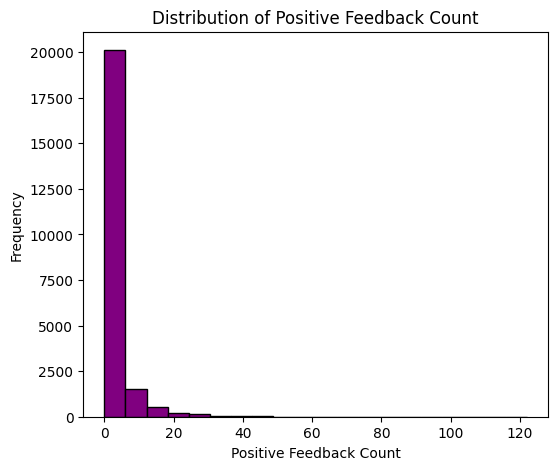

Items with the highest positive feedback: 
       Clothing ID Class Name  Positive Feedback Count
7218          1092    Dresses                      122
1294          1095    Dresses                      117
7765           986    Jackets                      108
19094         1121  Outerwear                       99
13210         1078    Dresses                       98


In [20]:
plt.figure(figsize=(6, 5))
plt.hist(df['Positive Feedback Count'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Positive Feedback Count')
plt.xlabel('Positive Feedback Count')
plt.ylabel('Frequency')
plt.show()

top_products = df.nlargest(5, 'Positive Feedback Count')
print('Items with the highest positive feedback: ')
print(top_products[['Clothing ID', 'Class Name','Positive Feedback Count']])

Customers really loved these items, they have the highest postive feedback counts <br>

#### Check Proportion of Target Class Variable:

In [21]:
df['Sentiment'].value_counts()

Positive    18540
Negative     4101
Name: Sentiment, dtype: int64

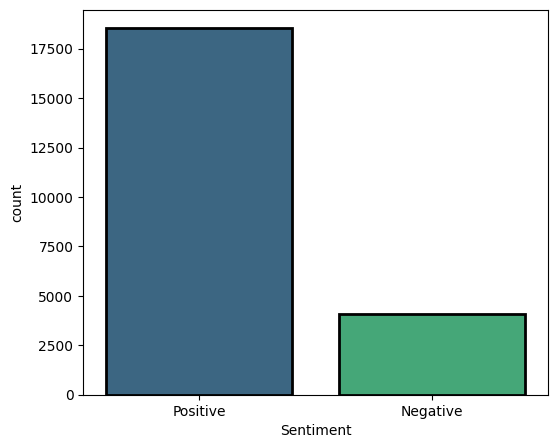

In [22]:
plt.figure(figsize=(6,5))
sns.countplot(x='Sentiment',data=df, edgecolor='k',
            linewidth=2, palette= 'viridis');

Highly Imbalanced classes class `postive` is almost 4x class `negative`

## Conclusions from EDA

- Overall, the customers leave postive reviews about our products but there is room for improvement
- Items with these clothing IDs [1078, 862, 1094, 868, 829] has so many negative reviews and can be further investgated
- Items with these clothing IDs [1092, 1095, 986, 1121, 1078] has very high number of postive reviews, perhaps we can include them in our marketing plans and advertise them via social media and add discounts for these items to bring more profit. 
- The classes are highle imbalanced which will have an effect in the modelling process and must be handled. 

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Storing the columns used for modelling

In [23]:
copy = df.copy()

In [24]:
data = df[['Review','Sentiment']]
data.head()

,Review,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,Positive
1,Love this dress! it's sooo pretty. i happene...,Positive
2,I had such high hopes for this dress and reall...,Negative
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive
4,This shirt is very flattering to all due to th...,Positive


---
---


### Missing Value Detection

In [25]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [26]:
data.duplicated().sum()

7

There are duplicated reveiws, although it's possible that customers may leave similar reviews; we cannot pass duplicate data to our model

In [27]:
data = data.dropna(axis=0,  how = 'all', subset=['Review'])

In [28]:
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



In [29]:
pprint(data['Review'][389])

("I don't normally review my purchases, but i was so amazed at how poorly this "
 "dress was made, i couldn't help myself but to post a review. the neck line "
 "isn't even hemmed down so it flaps up. the material is thin and feel cheap. "
 'this dress isnt even worth $20 in my opinion. i was expecting a well made, '
 'good quality dress for the high price tag.')


This text has punctuations, irregular symbols like $ , stop words etc... <br>

### Tokenization, Noise Removal, Lexicon Normalization

Assuming that negative rev may have negative verbs

In [30]:
stop_words = stopwords.words('english')

# keep these words in the corpus

for i in ['not', 'no',  'ain', 'aren', "aren't", 'couldn', "couldn't",
          'didn', "didn't", 'doesn', "doesn't", 'hadn',"hadn't", 'hasn', 
          "hasn't", 'haven', "haven't",'isn', "isn't", 'ma', 'mightn',
          "mightn't", 'mustn',"mustn't", 'needn', "needn't", 'shan',
          "shan't", 'shouldn',"shouldn't", 'wasn', "wasn't", 'weren', 
          "weren't", 'won',"won't", 'wouldn', "wouldn't"]:
    stop_words.remove(i)

In [31]:
def cleaning_text(text):
    '''
    Description:
    This function gets unclean text and tokenize it, clean it, remove stop words, and normalize it
    
    INPUT:
    text (str) - each row in a string format
    
    RETURN:
    cleaned text

    '''
    text = re.sub('http\S*', '', text).strip()
    text = re.sub('www\S*', '', text).strip()
    text = re.sub('#\S*', '', text).strip()
    text = re.sub('@\S*', '', text).strip()
    text = text.replace("'", "")
    text_tokens = word_tokenize(text.lower())
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    
    return " ".join(text_cleaned)

In [32]:
copy['Review'] = copy['Review'].apply(cleaning_text)
copy['Review'][:5]

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review, dtype: object

### Common words in the corpus 

In [33]:
copy['words_list'] = copy['Review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in copy['words_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','Words_count']
temp.style.background_gradient(cmap='Blues')

,Common_words,Words_count
0,dress,11352
1,fit,10127
2,not,9950
3,size,9363
4,love,8992
5,top,8281
6,like,7036
7,color,6916
8,look,6891
9,wear,6521


"Not" appears many times in the corpus which might be good hint for negative reviews

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [34]:
pos = data[data['Sentiment'] == 'Positive']['Review']
pos = pos.apply(cleaning_text)

In [35]:
neg = data[data['Sentiment'] == 'Negative']['Review']
neg = neg.apply(cleaning_text)

### Collect Words (positive and negative separately)

In [36]:
pos_collection = " ".join(pos)
neg_collection = " ".join(neg)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

#### Postive reviews

In [37]:
wordcloud_positive = WordCloud(background_color='white', max_words =250, scale=3, colormap='plasma')

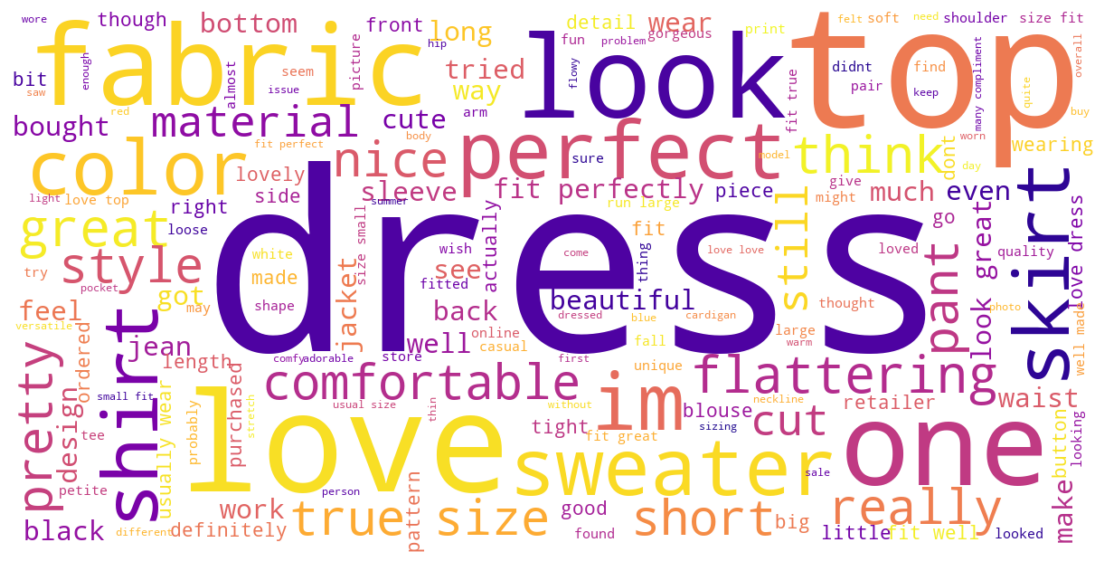

In [38]:
wordcloud_positive.generate(pos_collection)
plt.figure(figsize = (14,10))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Negative reviews

In [39]:
wordcloud_negative = WordCloud(background_color='white', max_words =250, scale=3, colormap='gist_heat')

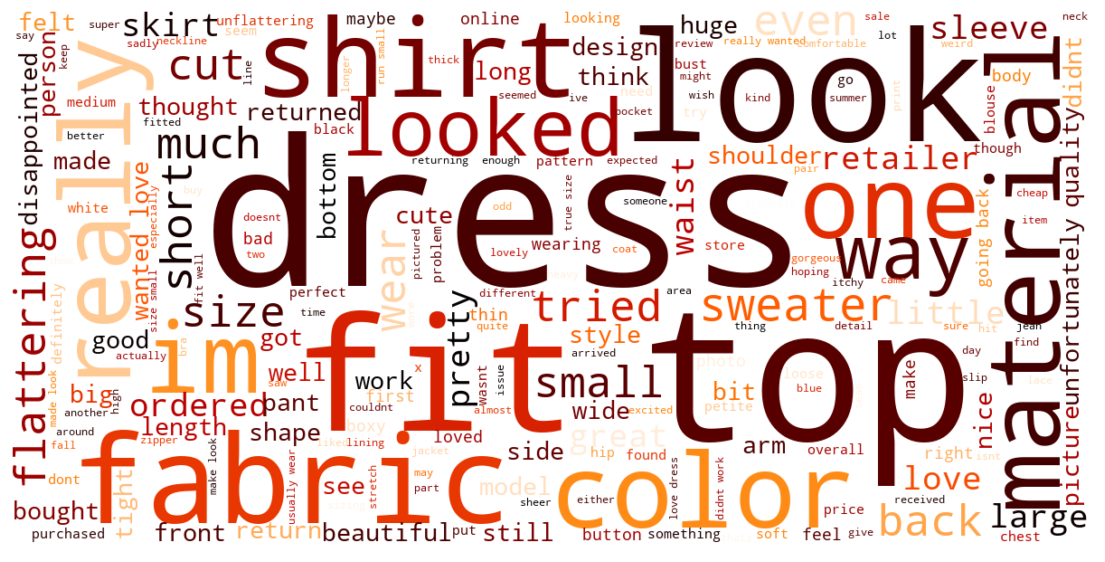

In [40]:
wordcloud_negative.generate(neg_collection)
plt.figure(figsize = (14,10))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

### Common words in both postive and negative reviews

In [41]:
pos_set = set(pos_collection.split())
neg_set = set(neg_collection.split())

common_words = pos_set.intersection(neg_set)

list_of_common_words = list(common_words)

In [42]:
wordcloud_common = WordCloud(background_color='white', max_words =250, scale=3, colormap='viridis')

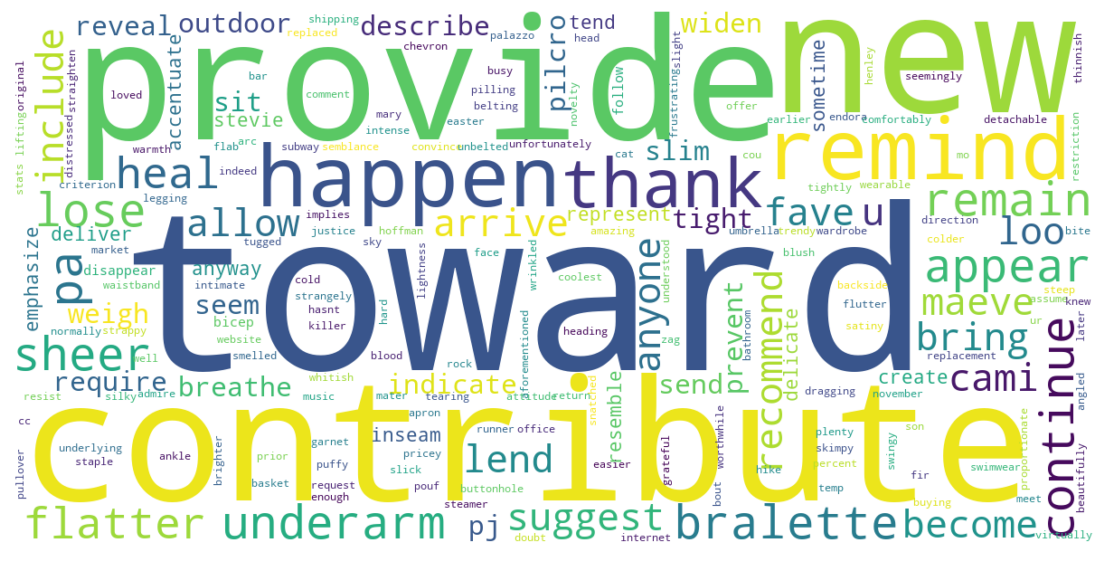

In [43]:
wordcloud_common.generate(" ".join(list_of_common_words))
plt.figure(figsize = (14,10))
plt.imshow(wordcloud_common, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [44]:
X = data['Review']
y = data['Sentiment']

In [45]:
# for ML only train/set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1010)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [46]:
vectorizer = CountVectorizer(preprocessor=cleaning_text, min_df=3) 
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [47]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())[:3]

,aa,ab,abdomen,ability,able,absolute,absolutely,abstract,absurd,abt,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [48]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning_text, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [49]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())[:3]

,aa,ab,abdomen,ability,able,absolute,absolutely,abstract,absurd,abt,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    '''
    Description:
    This function gets a model, train and test sets and return 
    the confusion matrix and classification report
    
    INPUT:
    model - fitted model
    X_train - input features for the training set
    y_train - target values for training set
    X_test - input features for the testing set
    y_test - target values for testing set
    
    RETURN:
    Nothing

    '''
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print('------------------------------------------------------')
    print("Test Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Since the classes are imbalanced we will focus on the `Negative` reviews during the modelling

In [51]:
f1_negative = make_scorer(f1_score, average=None, labels=['Negative'])

precision_negative = make_scorer(precision_score, average=None, labels=['Negative'])

recall_negative = make_scorer(recall_score, average=None, labels=['Negative'])


scoring = {'f1_negative': f1_negative,
           'precision_negative': precision_negative, 
           'recall_negative': recall_negative
           }

In [52]:
def ml_countvectorizer(model, model_name):
    '''
    Description:
    This function fit a model to the countvectorizer train data
    
    INPUT:
    model - unfitted model
    model_name - model name as str

    
    RETURN:
    cross val scores
    ''' 
    model.fit(X_train_count,y_train)
    print(model_name)
    eval_metric(model, X_train_count, y_train, X_test_count,y_test)
    print()
    scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    df_scores = pd.DataFrame(scores, index = range(1, 11))
    return df_scores.mean()[2:]

In [53]:
def ml_tfidf(model, model_name): 
    '''
    Description:
    This function fit a model to the tfidf train data
    
    INPUT:
    model - unfitted model
    model_name - model name as str

    
    RETURN:
    cross val scores
    ''' 
    model.fit(X_train_tf_idf,y_train)
    print(model_name)
    eval_metric(model, X_train_tf_idf, y_train, X_test_tf_idf,y_test)
    print()
    scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    df_scores = pd.DataFrame(scores, index = range(1, 11))
    return df_scores.mean()[2:]

## Logistic Regression

### CountVectorizer

In [54]:
log = LogisticRegression(max_iter = 10000, class_weight='balanced', random_state=101)
log_countvec_scores = ml_countvectorizer(log, 'Vanilla Logistic regression')
log_countvec_scores

Vanilla Logistic regression
Train Set
[[ 3178   103]
 [ 1128 13703]]
              precision    recall  f1-score   support

    Negative       0.74      0.97      0.84      3281
    Positive       0.99      0.92      0.96     14831

    accuracy                           0.93     18112
   macro avg       0.87      0.95      0.90     18112
weighted avg       0.95      0.93      0.94     18112

------------------------------------------------------
Test Set
[[ 641  179]
 [ 446 3263]]
              precision    recall  f1-score   support

    Negative       0.59      0.78      0.67       820
    Positive       0.95      0.88      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.77      0.83      0.79      4529
weighted avg       0.88      0.86      0.87      4529




test_f1_negative            0.679190
train_f1_negative           0.843391
test_precision_negative     0.604623
train_precision_negative    0.746124
test_recall_negative        0.775066
train_recall_negative       0.969826
dtype: float64

From the cross val results we can say that this model is overfitting the data

### TF-IDF

In [55]:
log_tfidf_scores = ml_tfidf(log, 'Vanilla Logistic regression 2')
log_tfidf_scores

Vanilla Logistic regression 2
Train Set
[[ 3060   221]
 [ 1687 13144]]
              precision    recall  f1-score   support

    Negative       0.64      0.93      0.76      3281
    Positive       0.98      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112

------------------------------------------------------
Test Set
[[ 694  126]
 [ 486 3223]]
              precision    recall  f1-score   support

    Negative       0.59      0.85      0.69       820
    Positive       0.96      0.87      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.78      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529




test_f1_negative            0.698341
train_f1_negative           0.763077
test_precision_negative     0.592537
train_precision_negative    0.645056
test_recall_negative        0.850651
train_recall_negative       0.933963
dtype: float64

Slightly overfitted model but better than count vectorizer

In [56]:
log.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 101,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter tunning - optuna

In [57]:

def objective(trial):
    """ This function create a new trial to find the optimal hyperparameters

    Args:
        trial : optuna object


    Returns:
        float: score 
    """

    # parameters to be searched
    C = trial.suggest_float('penalty_C', 0.01, 1.0, log=True)  
    solver = trial.suggest_categorical('solver', ['liblinear', 'sag','newton-cholesky'])

    log = LogisticRegression(
        max_iter = 10000,
        C=C,
        penalty='l2', # applying l2 to reduce overfitting
        solver=solver,
        class_weight='balanced')
    log.fit(X_train_tf_idf,y_train) # using tf-idf
    
    scores = cross_validate(log,
                        X_train_tf_idf,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    # scoring recall
    return scores['test_recall_negative'].mean()

study = optuna.create_study(direction='maximize', study_name='Logistic regression tunning')
study.optimize(objective, n_trials=10) # reduce trial

print('Best trial: {}'.format(study.best_trial.number))
print('Recall for negative class: {}'.format(study.best_trial.value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-11-14 18:28:44,664] A new study created in memory with name: Logistic regression tunning
[I 2023-11-14 18:28:47,272] Trial 0 finished with value: 0.8582715546000443 and parameters: {'penalty_C': 0.5578425193316043, 'solver': 'sag'}. Best is trial 0 with value: 0.8582715546000443.
[I 2023-11-14 18:28:49,873] Trial 1 finished with value: 0.8515660908888723 and parameters: {'penalty_C': 0.9495886151865917, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8582715546000443.
[I 2023-11-14 18:29:36,954] Trial 2 finished with value: 0.8619328712284082 and parameters: {'penalty_C': 0.11374220541550192, 'solver': 'newton-cholesky'}. Best is trial 2 with value: 0.8619328712284082.
[I 2023-11-14 18:29:42,452] Trial 3 finished with value: 0.860102676254726 and parameters: {'penalty_C': 0.44639830244255585, 'solver': 'sag'}. Best is trial 2 with value: 0.8619328712284082.
[I 2023-11-14 18:29:46,552] Trial 4 finished with value: 0.8597977982059456 and parameters: {'penalty_C': 0.05947147

Best trial: 2
Recall for negative class: 0.8619328712284082
Best hyperparameters: {'penalty_C': 0.11374220541550192, 'solver': 'newton-cholesky'}


In [58]:
C = study.best_params['penalty_C']
solver = study.best_params['solver']

In [59]:
log = LogisticRegression(
        max_iter = 10000,
        C=C,
        penalty='l2',
        solver=solver,
        class_weight='balanced')
log_tfidf_scores_tuned = ml_tfidf(log, 'Tuned Logistic regression')
log_tfidf_scores_tuned

Tuned Logistic regression
Train Set
[[ 2940   341]
 [ 2161 12670]]
              precision    recall  f1-score   support

    Negative       0.58      0.90      0.70      3281
    Positive       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.78      0.88      0.81     18112
weighted avg       0.90      0.86      0.87     18112

------------------------------------------------------
Test Set
[[ 697  123]
 [ 572 3137]]
              precision    recall  f1-score   support

    Negative       0.55      0.85      0.67       820
    Positive       0.96      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.78      4529
weighted avg       0.89      0.85      0.86      4529




test_f1_negative            0.673170
train_f1_negative           0.701211
test_precision_negative     0.552407
train_precision_negative    0.575396
test_recall_negative        0.861933
train_recall_negative       0.897457
dtype: float64

Better results after L2 reg.

## Naive Bayes 

### Countvectorizer

In [60]:
nb = BernoulliNB(force_alpha=True)
nb_countvec_scores = ml_countvectorizer(nb, 'Vanilla Naive Bayes')
nb_countvec_scores

Vanilla Naive Bayes
Train Set
[[ 2606   675]
 [ 1187 13644]]
              precision    recall  f1-score   support

    Negative       0.69      0.79      0.74      3281
    Positive       0.95      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.90      0.90      0.90     18112

------------------------------------------------------
Test Set
[[ 602  218]
 [ 342 3367]]
              precision    recall  f1-score   support

    Negative       0.64      0.73      0.68       820
    Positive       0.94      0.91      0.92      3709

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.88      0.88      0.88      4529




test_f1_negative            0.679282
train_f1_negative           0.737751
test_precision_negative     0.635502
train_precision_negative    0.691081
test_recall_negative        0.729964
train_recall_negative       0.791188
dtype: float64

### TF-IDF

In [61]:
nb_tfidf_scores =  ml_tfidf(nb, 'Vanilla Naive Bayes 2')
nb_tfidf_scores

Vanilla Naive Bayes 2
Train Set
[[ 2606   675]
 [ 1187 13644]]
              precision    recall  f1-score   support

    Negative       0.69      0.79      0.74      3281
    Positive       0.95      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.86      0.84     18112
weighted avg       0.90      0.90      0.90     18112

------------------------------------------------------
Test Set
[[ 602  218]
 [ 342 3367]]
              precision    recall  f1-score   support

    Negative       0.64      0.73      0.68       820
    Positive       0.94      0.91      0.92      3709

    accuracy                           0.88      4529
   macro avg       0.79      0.82      0.80      4529
weighted avg       0.88      0.88      0.88      4529




test_f1_negative            0.679282
train_f1_negative           0.737751
test_precision_negative     0.635502
train_precision_negative    0.691081
test_recall_negative        0.729964
train_recall_negative       0.791188
dtype: float64

similar results for both count vec. and tf-idf

In [62]:
nb.get_params()

{'alpha': 1.0,
 'binarize': 0.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': True}

Not a lot of params to be tuned but we will try to improve recall scores for class 0

In [63]:
def objective(trial):
    """ This function create a new trial to find the optimal hyperparameters
    Args:
        trial : optuna object
    Returns:
        float: score 
    """
    # parameters to be searched
    alpha = trial.suggest_float('alpha', 0.1, 1.0, log=True)  
    fit_prior = trial.suggest_categorical('fit_prior', [True, False])
    nb = BernoulliNB(force_alpha=True, alpha=alpha, fit_prior=fit_prior)
    nb.fit(X_train_tf_idf,y_train)
    
    scores = cross_validate(nb,
                        X_train_tf_idf,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    # scoring recall
    return scores['test_recall_negative'].mean()

study = optuna.create_study(direction='maximize', study_name='Naive Bayes tunning')
study.optimize(objective, n_trials=10) # reduce trial

print('Best trial: {}'.format(study.best_trial.number))
print('Recall for negative class: {}'.format(study.best_trial.value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-11-14 18:31:31,246] A new study created in memory with name: Naive Bayes tunning
[I 2023-11-14 18:31:33,231] Trial 0 finished with value: 0.8540078953221144 and parameters: {'alpha': 0.22114272497154436, 'fit_prior': False}. Best is trial 0 with value: 0.8540078953221144.
[I 2023-11-14 18:31:35,281] Trial 1 finished with value: 0.749468085106383 and parameters: {'alpha': 0.3657341634622438, 'fit_prior': True}. Best is trial 0 with value: 0.8540078953221144.
[I 2023-11-14 18:31:37,173] Trial 2 finished with value: 0.7436809622655497 and parameters: {'alpha': 0.6266068078111319, 'fit_prior': True}. Best is trial 0 with value: 0.8540078953221144.
[I 2023-11-14 18:31:39,031] Trial 3 finished with value: 0.8524825783972126 and parameters: {'alpha': 0.1961416632935231, 'fit_prior': False}. Best is trial 0 with value: 0.8540078953221144.
[I 2023-11-14 18:31:41,073] Trial 4 finished with value: 0.860105456297724 and parameters: {'alpha': 0.3430227651841857, 'fit_prior': False}. Best is

Best trial: 4
Recall for negative class: 0.860105456297724
Best hyperparameters: {'alpha': 0.3430227651841857, 'fit_prior': False}


In [64]:
alpha = study.best_params['alpha']
fit_prior = study.best_params['fit_prior']

In [65]:
nb = BernoulliNB(force_alpha=True, alpha=alpha, fit_prior=fit_prior)
nb_tfidf_scores_tuned =  ml_tfidf(nb, 'Tuned Naive Bayes')
nb_tfidf_scores_tuned

Tuned Naive Bayes
Train Set
[[ 2992   289]
 [ 1897 12934]]
              precision    recall  f1-score   support

    Negative       0.61      0.91      0.73      3281
    Positive       0.98      0.87      0.92     14831

    accuracy                           0.88     18112
   macro avg       0.80      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112

------------------------------------------------------
Test Set
[[ 694  126]
 [ 503 3206]]
              precision    recall  f1-score   support

    Negative       0.58      0.85      0.69       820
    Positive       0.96      0.86      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529




test_f1_negative            0.685424
train_f1_negative           0.734578
test_precision_negative     0.569957
train_precision_negative    0.615082
test_recall_negative        0.860105
train_recall_negative       0.911714
dtype: float64

The recall for class Negative has been improved

## Support Vector Machine (SVM)

### Countvectorizer

In [67]:
svm = LinearSVC(class_weight='balanced', max_iter=10000, random_state=101) # the regular SVC took a long time to train the data so linear is the alt.
svm_countvec_scores = ml_countvectorizer(svm , 'Vanilla SVM')
svm_countvec_scores

C:\Users\arwao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Vanilla SVM
Train Set
[[ 3228    53]
 [  658 14173]]
              precision    recall  f1-score   support

    Negative       0.83      0.98      0.90      3281
    Positive       1.00      0.96      0.98     14831

    accuracy                           0.96     18112
   macro avg       0.91      0.97      0.94     18112
weighted avg       0.97      0.96      0.96     18112

------------------------------------------------------
Test Set
[[ 573  247]
 [ 408 3301]]
              precision    recall  f1-score   support

    Negative       0.58      0.70      0.64       820
    Positive       0.93      0.89      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.76      0.79      0.77      4529
weighted avg       0.87      0.86      0.86      4529




test_f1_negative            0.629367
train_f1_negative           0.912361
test_precision_negative     0.576827
train_precision_negative    0.847652
test_recall_negative        0.692777
train_recall_negative       0.987775
dtype: float64

Lower scores on test indecate overfitting

### TD-IDF

In [68]:
svm_tfidf_scores = ml_tfidf(svm, 'Vanilla SVM 2')
svm_tfidf_scores

C:\Users\arwao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Vanilla SVM 2
Train Set
[[ 3188    93]
 [ 1168 13663]]
              precision    recall  f1-score   support

    Negative       0.73      0.97      0.83      3281
    Positive       0.99      0.92      0.96     14831

    accuracy                           0.93     18112
   macro avg       0.86      0.95      0.90     18112
weighted avg       0.95      0.93      0.93     18112

------------------------------------------------------
Test Set
[[ 651  169]
 [ 441 3268]]
              precision    recall  f1-score   support

    Negative       0.60      0.79      0.68       820
    Positive       0.95      0.88      0.91      3709

    accuracy                           0.87      4529
   macro avg       0.77      0.84      0.80      4529
weighted avg       0.89      0.87      0.87      4529




test_f1_negative            0.679963
train_f1_negative           0.840573
test_precision_negative     0.600346
train_precision_negative    0.738415
test_recall_negative        0.784207
train_recall_negative       0.975549
dtype: float64

Still overfitted but better than count vector.

In [69]:
svm.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': 'warn',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 10000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 101,
 'tol': 0.0001,
 'verbose': 0}

In [72]:
def objective(trial):
    """ This function create a new trial to find the optimal hyperparameters
    Args:
        trial : optuna object
    Returns:
        float: score 
    """
    # parameters to be searched
    C = trial.suggest_float('penalty_C', 0.01, 1.0, log=True) 
    penalty = trial.suggest_categorical('penalty', ['l1','l2'])

    svm = LinearSVC(class_weight='balanced', 
                    max_iter=10000, 
                    random_state=101,
                    dual='auto', 
                    C=C,
                    penalty=penalty
                    )
    scores = cross_validate(svm,
                        X_train_tf_idf,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    # scoring recall
    return scores['test_recall_negative'].mean()

study = optuna.create_study(direction='maximize', study_name='SVM tunning')
study.optimize(objective, n_trials=10) 

print('Best trial: {}'.format(study.best_trial.number))
print('Recall for negative class: {}'.format(study.best_trial.value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-11-14 18:41:57,240] A new study created in memory with name: SVM tunning


[I 2023-11-14 18:42:00,136] Trial 0 finished with value: 0.8585838460968196 and parameters: {'penalty_C': 0.1440686419427121, 'penalty': 'l1'}. Best is trial 0 with value: 0.8585838460968196.
[I 2023-11-14 18:42:02,277] Trial 1 finished with value: 0.8095096004151531 and parameters: {'penalty_C': 0.01053492702927108, 'penalty': 'l1'}. Best is trial 0 with value: 0.8585838460968196.
[I 2023-11-14 18:42:05,175] Trial 2 finished with value: 0.8594966268811625 and parameters: {'penalty_C': 0.14465400546897794, 'penalty': 'l1'}. Best is trial 2 with value: 0.8594966268811625.
[I 2023-11-14 18:42:07,120] Trial 3 finished with value: 0.8159120394395434 and parameters: {'penalty_C': 0.014689419399764229, 'penalty': 'l1'}. Best is trial 2 with value: 0.8594966268811625.
[I 2023-11-14 18:42:09,138] Trial 4 finished with value: 0.80890262436059 and parameters: {'penalty_C': 0.013168238252658348, 'penalty': 'l1'}. Best is trial 2 with value: 0.8594966268811625.
[I 2023-11-14 18:42:11,541] Trial 5 

Best trial: 6
Recall for negative class: 0.8668081399658982
Best hyperparameters: {'penalty_C': 0.030512667428265833, 'penalty': 'l2'}


In [74]:
C = study.best_params['penalty_C']
penalty = study.best_params['penalty']

In [75]:
svm = LinearSVC(class_weight='balanced', 
                    max_iter=10000, 
                    random_state=101,
                    dual='auto', 
                    C=C,
                    penalty=penalty
                    )
svm_tfidf_scores_tuned =  ml_tfidf(svm, 'Tuned SVM')
svm_tfidf_scores_tuned

Tuned SVM
Train Set
[[ 3011   270]
 [ 1994 12837]]
              precision    recall  f1-score   support

    Negative       0.60      0.92      0.73      3281
    Positive       0.98      0.87      0.92     14831

    accuracy                           0.88     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.88      0.88     18112

------------------------------------------------------
Test Set
[[ 702  118]
 [ 544 3165]]
              precision    recall  f1-score   support

    Negative       0.56      0.86      0.68       820
    Positive       0.96      0.85      0.91      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529




test_f1_negative            0.687504
train_f1_negative           0.727409
test_precision_negative     0.569896
train_precision_negative    0.602218
test_recall_negative        0.866808
train_recall_negative       0.918318
dtype: float64

Good results for the Negative class after tunning

## Random Forest

### Countvectorizer

In [76]:
rf = RandomForestClassifier(random_state=101)
rf_countvec_scores = ml_countvectorizer(rf , 'Vanilla Random Forest')
rf_countvec_scores

Vanilla Random Forest
Train Set
[[ 3281     0]
 [    0 14831]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      3281
    Positive       1.00      1.00      1.00     14831

    accuracy                           1.00     18112
   macro avg       1.00      1.00      1.00     18112
weighted avg       1.00      1.00      1.00     18112

------------------------------------------------------
Test Set
[[ 222  598]
 [  53 3656]]
              precision    recall  f1-score   support

    Negative       0.81      0.27      0.41       820
    Positive       0.86      0.99      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.83      0.63      0.66      4529
weighted avg       0.85      0.86      0.83      4529




test_f1_negative            0.399897
train_f1_negative           1.000000
test_precision_negative     0.853048
train_precision_negative    1.000000
test_recall_negative        0.261824
train_recall_negative       1.000000
dtype: float64

The RF model is very overfitted and shows bad results for class Negative

### TF-IDF

In [77]:
rf_tfidf_scores = ml_tfidf(rf , 'Vanilla Random Forest 2')
rf_tfidf_scores

Vanilla Random Forest 2
Train Set
[[ 3281     0]
 [    0 14831]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      3281
    Positive       1.00      1.00      1.00     14831

    accuracy                           1.00     18112
   macro avg       1.00      1.00      1.00     18112
weighted avg       1.00      1.00      1.00     18112

------------------------------------------------------
Test Set
[[ 221  599]
 [  29 3680]]
              precision    recall  f1-score   support

    Negative       0.88      0.27      0.41       820
    Positive       0.86      0.99      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.87      0.63      0.67      4529
weighted avg       0.86      0.86      0.83      4529




test_f1_negative            0.371054
train_f1_negative           1.000000
test_precision_negative     0.863435
train_precision_negative    1.000000
test_recall_negative        0.236828
train_recall_negative       1.000000
dtype: float64

The same applies here, we will try to reduce overfitting using lower depth for the trees

In [78]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [79]:
def objective(trial):
    """ This function create a new trial to find the optimal hyperparameters

    Args:
        trial : optuna object


    Returns:
        float: score 
    """

    # parameters to be searched
    max_depth = trial.suggest_int('depth', 2,4)
    #class0_w = trial.suggest_float('w0', 2.7, 3.7, log=True)  
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    n_estimators = trial.suggest_int('no. of est', 50,500)
    
    rf = RandomForestClassifier(
        random_state=101,
        max_depth=max_depth,
        class_weight='balanced',
        criterion=criterion,
        n_estimators=n_estimators)
    
    rf.fit(X_train_tf_idf,y_train) 
    
    scores = cross_validate(rf,
                        X_train_count,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    # scoring recall
    return scores['test_recall_negative'].mean()

study = optuna.create_study(direction='maximize', study_name='Random forest tunning')
study.optimize(objective, n_trials=10) # reduce trial

print('Best trial: {}'.format(study.best_trial.number))
print('Recall for negative class: {}'.format(study.best_trial.value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-11-14 18:54:12,849] A new study created in memory with name: Random forest tunning
[I 2023-11-14 18:54:30,876] Trial 0 finished with value: 0.8277920898509897 and parameters: {'depth': 4, 'criterion': 'gini', 'no. of est': 358}. Best is trial 0 with value: 0.8277920898509897.
[I 2023-11-14 18:54:38,827] Trial 1 finished with value: 0.814997405293202 and parameters: {'depth': 3, 'criterion': 'gini', 'no. of est': 147}. Best is trial 0 with value: 0.8277920898509897.
[I 2023-11-14 18:54:43,159] Trial 2 finished with value: 0.8034101860775447 and parameters: {'depth': 3, 'criterion': 'gini', 'no. of est': 61}. Best is trial 0 with value: 0.8277920898509897.
[I 2023-11-14 18:54:59,905] Trial 3 finished with value: 0.825966528282304 and parameters: {'depth': 2, 'criterion': 'gini', 'no. of est': 384}. Best is trial 0 with value: 0.8277920898509897.
[I 2023-11-14 18:55:20,422] Trial 4 finished with value: 0.8290162354511084 and parameters: {'depth': 2, 'criterion': 'gini', 'no. of es

Best trial: 6
Recall for negative class: 0.8332826747720364
Best hyperparameters: {'depth': 3, 'criterion': 'gini', 'no. of est': 363}


In [80]:
max_depth = study.best_params['depth']
criterion =  study.best_params['criterion']
n_estimators = study.best_params['no. of est']

In [81]:
rf = RandomForestClassifier(
        random_state=101,
        max_depth=max_depth,
        class_weight='balanced',
        criterion=criterion,
        n_estimators=n_estimators)
rf_tfidf_scores_tuned =  ml_tfidf(rf, 'Tuned Random Forest')
rf_tfidf_scores_tuned

Tuned Random Forest
Train Set
[[ 2810   471]
 [ 2826 12005]]
              precision    recall  f1-score   support

    Negative       0.50      0.86      0.63      3281
    Positive       0.96      0.81      0.88     14831

    accuracy                           0.82     18112
   macro avg       0.73      0.83      0.75     18112
weighted avg       0.88      0.82      0.83     18112

------------------------------------------------------
Test Set
[[ 660  160]
 [ 747 2962]]
              precision    recall  f1-score   support

    Negative       0.47      0.80      0.59       820
    Positive       0.95      0.80      0.87      3709

    accuracy                           0.80      4529
   macro avg       0.71      0.80      0.73      4529
weighted avg       0.86      0.80      0.82      4529




test_f1_negative            0.610169
train_f1_negative           0.633045
test_precision_negative     0.480197
train_precision_negative    0.499863
test_recall_negative        0.836941
train_recall_negative       0.863457
dtype: float64

Better results and no overfitting

## Ada Boosting

### Countvectorizer

In [82]:
AdaBoost = AdaBoostClassifier(random_state = 101)
ada_countvec_scores = ml_countvectorizer(AdaBoost , 'Vanilla AdaBoost')
ada_countvec_scores

Vanilla AdaBoost
Train Set
[[ 1491  1790]
 [  675 14156]]
              precision    recall  f1-score   support

    Negative       0.69      0.45      0.55      3281
    Positive       0.89      0.95      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.79      0.70      0.73     18112
weighted avg       0.85      0.86      0.85     18112

------------------------------------------------------
Test Set
[[ 360  460]
 [ 183 3526]]
              precision    recall  f1-score   support

    Negative       0.66      0.44      0.53       820
    Positive       0.88      0.95      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.77      0.69      0.72      4529
weighted avg       0.84      0.86      0.85      4529




test_f1_negative            0.540919
train_f1_negative           0.550054
test_precision_negative     0.680196
train_precision_negative    0.690707
test_recall_negative        0.449570
train_recall_negative       0.457009
dtype: float64

### TF-IDF

In [83]:
ada_tfidf_scores = ml_tfidf(AdaBoost , 'Vanilla AdaBoost 2')
ada_tfidf_scores

Vanilla AdaBoost 2
Train Set
[[ 1551  1730]
 [  657 14174]]
              precision    recall  f1-score   support

    Negative       0.70      0.47      0.57      3281
    Positive       0.89      0.96      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.80      0.71      0.74     18112
weighted avg       0.86      0.87      0.86     18112

------------------------------------------------------
Test Set
[[ 365  455]
 [ 174 3535]]
              precision    recall  f1-score   support

    Negative       0.68      0.45      0.54       820
    Positive       0.89      0.95      0.92      3709

    accuracy                           0.86      4529
   macro avg       0.78      0.70      0.73      4529
weighted avg       0.85      0.86      0.85      4529




test_f1_negative            0.542823
train_f1_negative           0.563403
test_precision_negative     0.681657
train_precision_negative    0.702480
test_recall_negative        0.451683
train_recall_negative       0.470317
dtype: float64

No overfitting but the scores are bad for the negative class

In [84]:
AdaBoost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 101}

In [89]:
def objective(trial):
    """ This function create a new trial to find the optimal hyperparameters

    Args:
        trial : optuna object


    Returns:
        float: score 
    """

    # parameters to be searched
    learning_rate = trial.suggest_float('learning_rate', 0.8, 1.0, log=True) 
    algorithm = trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R'])
    n_estimators = trial.suggest_int('no. of est', 50,200)
    
    AdaBoost = AdaBoostClassifier(random_state = 101, 
                                  n_estimators=n_estimators,
                                  algorithm=algorithm,
                                  learning_rate=learning_rate)
    
    AdaBoost.fit(X_train_tf_idf,y_train) 
    
    scores = cross_validate(AdaBoost,
                        X_train_count,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
    # scoring recall
    return scores['test_recall_negative'].mean()

study = optuna.create_study(direction='maximize', study_name='AdaBoost tunning')
study.optimize(objective, n_trials=10) 

print('Best trial: {}'.format(study.best_trial.number))
print('Recall for negative class: {}'.format(study.best_trial.value))
print('Best hyperparameters: {}'.format(study.best_params))

[I 2023-11-14 21:40:32,734] A new study created in memory with name: AdaBoost tunning
[I 2023-11-14 21:40:50,270] Trial 0 finished with value: 0.1414198606271777 and parameters: {'learning_rate': 0.9450478703113611, 'algorithm': 'SAMME', 'no. of est': 50}. Best is trial 0 with value: 0.1414198606271777.
[I 2023-11-14 21:41:13,473] Trial 1 finished with value: 0.15056620209059232 and parameters: {'learning_rate': 0.9655410036243876, 'algorithm': 'SAMME', 'no. of est': 54}. Best is trial 1 with value: 0.15056620209059232.


In [ ]:
learning_rate = study.best_params['learning_rate']
algorithm =  study.best_params['algorithm']
n_estimators = study.best_params['no. of est']

In [ ]:
AdaBoost = AdaBoostClassifier(random_state = 101, 
                                  n_estimators=n_estimators,
                                  algorithm=algorithm,
                                  learning_rate=learning_rate)
Ada_tfidf_scores_tuned =  ml_tfidf(AdaBoost, 'Tuned AdaBoost')
Ada_tfidf_scores_tuned

## ML Models Comparison

## DL modeling

### Tokenization

### Creating word index

### Converting tokens to numeric

### Maximum number of tokens for all documents¶

### Fixing token counts of all documents (pad_sequences)

### Train Set Split

### Modeling

### Model Evaluation

## BERT Modeling

### Read Data

### Train test split

### Tokenization

### Fixing token counts of all documents

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

### Batch Size

### Creating optimization

### Creating Model with TPU

### Model Fiting

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___